<h1> The Sparks Foundation - #GRIPJUNE21 </h1>

<h1>Author: Shreya Dharmadhikari</h1>

<h1> Task-1 : Prediction using Supervised ML </h1>

<h2> Problem Statement: Predict the percentage of a student based on the no. of study hours. </h2>

<h2> Code: </h2>

In [14]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [15]:
# Importing and reading the dataset.
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

df.head(10)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [16]:
#Understanding of the dataset:
#info() method gives information like no of rows and columns in the dataset along with their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
#describe() method is used to view the statistical summary of all the numerical columns in the dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [18]:
#Check if any null values are present in the dataset
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<h4>Thus, No Null values present </h4>

<h3> Graphically represent data to find the relationship between the given variables </h3>

No handles with labels found to put in legend.


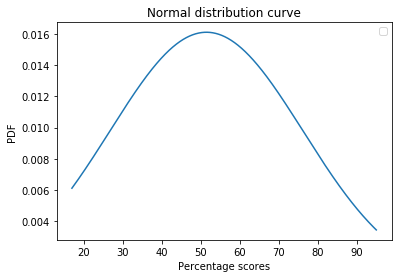

In [19]:
#visually represent the distribution of scores using normal curve.

score=df['Scores']
mean=np.mean(score)
std=np.std(score)

import matplotlib.pyplot as plt

domain=np.linspace(np.min(score),np.max(score),1000)
plt.plot(domain,norm.pdf(domain,mean,std))
plt.title('Normal distribution curve')
plt.xlabel('Percentage scores')
plt.ylabel('PDF')
plt.legend()
plt.show()

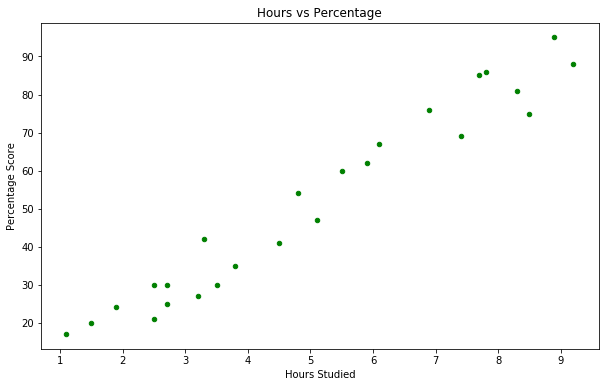

In [20]:
# Draw a scatter plot between Marks scored and No. of hours of study
df.plot(x='Hours', y='Scores', kind='scatter', figsize=(10,6), color='green')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<h3>From the above scatter plot we can see, there exist a positive linear correlation between No. of hours studied and Percentage score. </h3>

<h2>Splitting of the data</h2>

In [21]:
# Now we need to divide data into attributes and labels. Attributes are independent variables and labels are dependent 
# variables. In this dataset No. of hours of study is independent variable and Percentage score we need to predict from 
# No. of study which is a dependent variable.

In [22]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Now the splitting of the data into training and testing sets is done.

<h2>Training and implementing the model </h2>

In [24]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [25]:
print("Equation of regression line")
print("line=",reg.coef_,"* X  +", reg.intercept_)

Equation of regression line
line= [9.91065648] * X  + 2.018160041434683


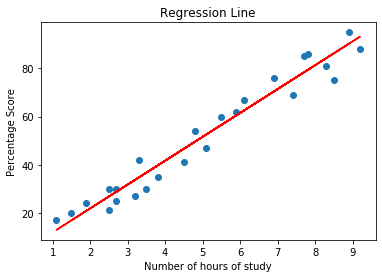

In [27]:
# Plotting the regression line
line = reg.coef_*X+reg.intercept_
plt.title("Regression Line")
plt.xlabel("Number of hours of study")
plt.ylabel("Percentage Score")
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color="red");
plt.show()

<h4>Above plot shows that linear regression model used for No. of hours of study versus Percentage score nearly fits all the datapoints</h4>

<h2>Making Prediction</h2>

In [28]:
#print the testing data which is No. of hours of study in Hours
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [29]:
#Predicting the percentage Score of student based on testing data.
y_pred=reg.predict(X_test)

In [30]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


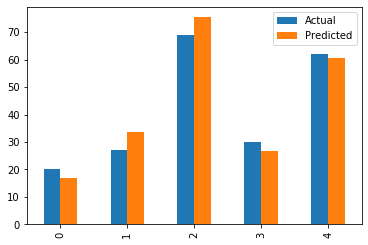

In [31]:
df.plot(kind='bar')

In [32]:
# Now test the model for No. of Hours=9.25
hours = 9.25
test=np.array([hours])
test=test.reshape(-1,1)
pred = reg.predict([[9.25]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


<h3> Thus, if a student studies for 9.25 hours/day the he/she will score 93.69% according to the prediction </h3>

<h2> Evaluating the Model </h2>

In [33]:
#import all the evaluation metrices
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print('r2score: ',r2_score(y_test,y_pred))
print('mae:',mean_absolute_error(y_test,y_pred))
print('mse:',mean_squared_error(y_test,y_pred))
print('rmse:',np.sqrt(mean_absolute_error(y_test,y_pred)))

r2score:  0.9454906892105356
mae: 4.183859899002975
mse: 21.5987693072174
rmse: 2.0454485813637495


<h4> Thus mean squared error, mean absolute error, root mean square errors and  r squared test can be used to evaluate the model and mae, mse and rmse should be as small as possible. If mean squared error is larger then larger is the error. Thus, mean squared error should be small</h4>

<h2> Conclusion </h2>
<h3> 1.Successfully predicted the percentage score of a student from the number of hours of study using Linear regression model</h3>
<h3> 2.If a student studies 9.25 hours/day then he/she will score 93.69% </h3>